In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv("eda/stud.csv")

In [3]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
data.shape

(1000, 8)

In [6]:
data.corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


In [9]:
data.skew()

math_score      -0.278935
reading_score   -0.259105
writing_score   -0.289444
dtype: float64

In [8]:
data_seto=data.loc[data['parental_level_of_education']=='high school']

In [9]:
data_meto=data.loc[data['parental_level_of_education']=='some college']

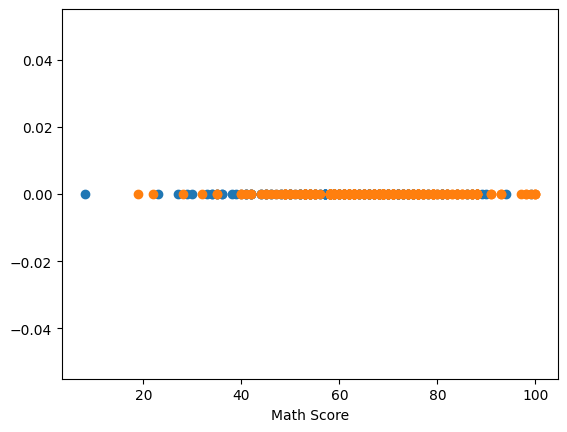

In [16]:
plt.plot(data_seto['math_score'],np.zeros_like(data_seto['math_score']),'o')
plt.plot(data_meto['math_score'],np.zeros_like(data_meto['math_score']),'o')
plt.xlabel('Math Score')
plt.show()

###  Bivariate Analysis


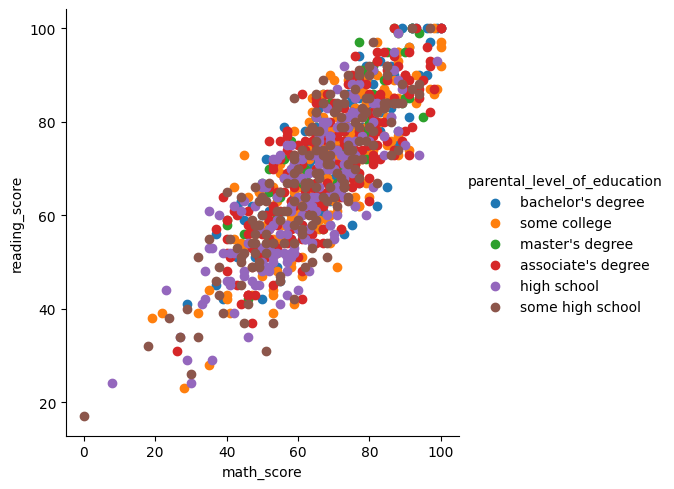

In [17]:
sns.FacetGrid(data,hue="parental_level_of_education",size=5).map(plt.scatter,"math_score","reading_score").add_legend();
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


###  Multivariate Analysis

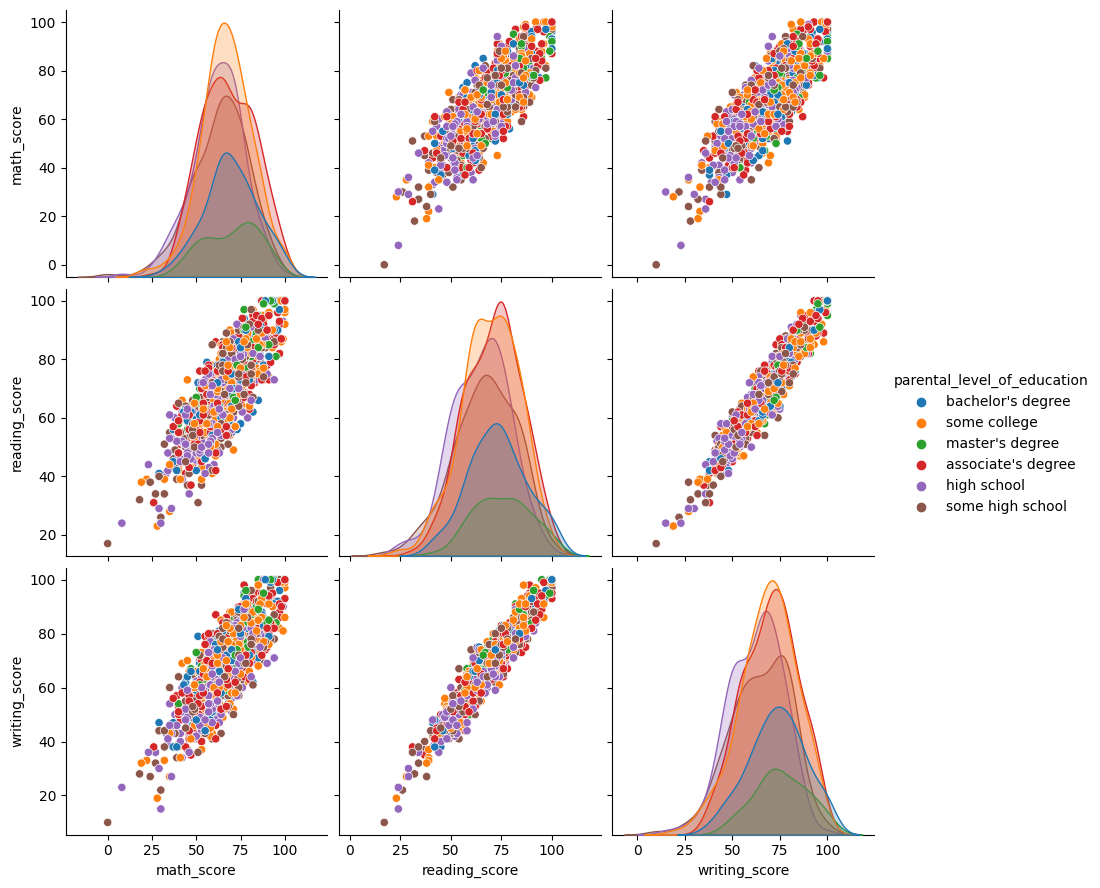

In [19]:
sns.pairplot(data,hue='parental_level_of_education',size=3)

In [15]:
cat_col=[fea for fea in data.columns if data[fea].dtype=='o']

In [16]:
num_col=[fea for fea in data.columns if data[fea].dtype!='o']

In [21]:
data_num=data[num_col]
data_num.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
data.memory_usage()

Index                           132
gender                         8000
race_ethnicity                 8000
parental_level_of_education    8000
lunch                          8000
test_preparation_course        8000
math_score                     8000
reading_score                  8000
writing_score                  8000
dtype: int64

In [53]:
scaler=MinMaxScaler()

In [55]:
scaled_data=scaler.fit_transform(data)

ValueError: could not convert string to float: 'female'

Memory Usage

In [53]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
Average                        0
dtype: int64

Duplicate Values

In [12]:
data.duplicated().sum()

0

Unique Values



In [13]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [14]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

Corr

In [15]:
data.corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


In [16]:
data.skew()

math_score      -0.278935
reading_score   -0.259105
writing_score   -0.289444
dtype: float64

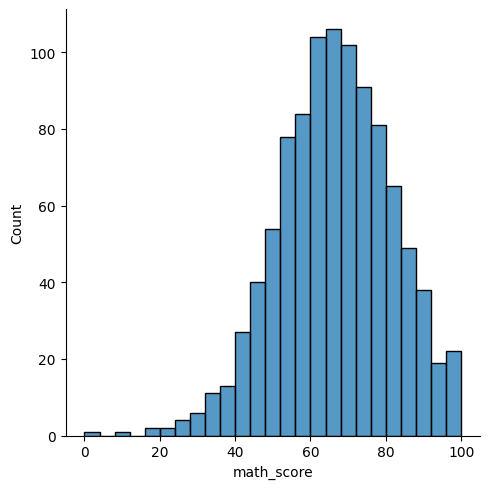

In [17]:
sns.displot(data['math_score'])

In [18]:
data['Average']=(data['math_score'] + data['reading_score'] + data['writing_score'])/3

In [19]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [20]:
data[data["math_score"]<30].count()

gender                         14
race_ethnicity                 14
parental_level_of_education    14
lunch                          14
test_preparation_course        14
math_score                     14
reading_score                  14
writing_score                  14
Average                        14
dtype: int64

In [21]:
data_num=data[num_col]

In [22]:
data_num.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
from scipy.stats import normaltest

In [24]:
normaltest(data_num['math_score'])[1]*100

0.04508029386993784

In [25]:
if p>0.05 then my data will be normally distributed

SyntaxError: invalid syntax (978455825.py, line 1)

<AxesSubplot: xlabel='math_score', ylabel='Density'>

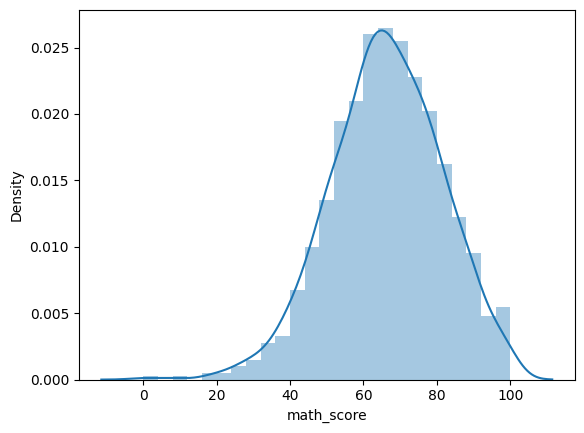

In [22]:
sns.distplot(data_num['math_score'])

<AxesSubplot: xlabel='reading_score', ylabel='Density'>

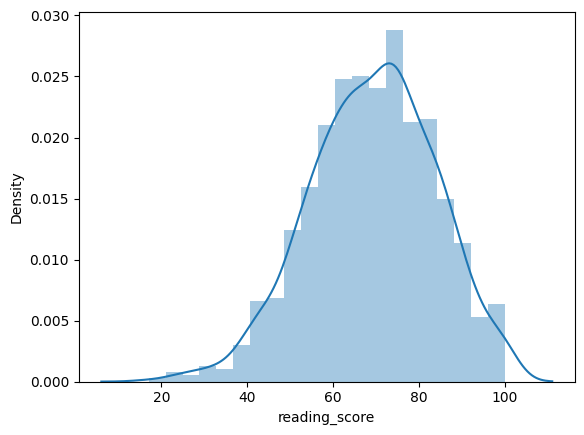

In [23]:
sns.distplot(data_num['reading_score'])

<AxesSubplot: xlabel='writing_score', ylabel='Density'>

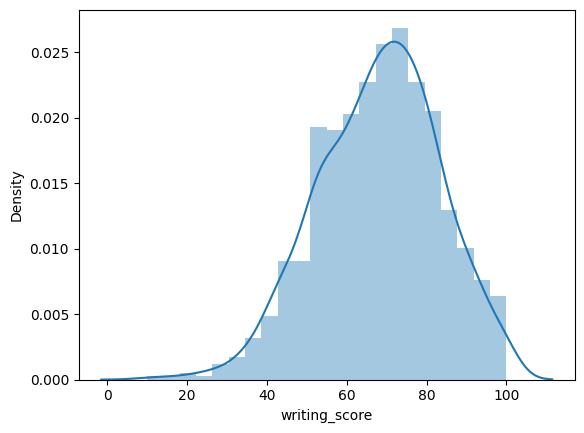

In [24]:
sns.distplot(data['writing_score'])

<AxesSubplot: xlabel='math_score'>

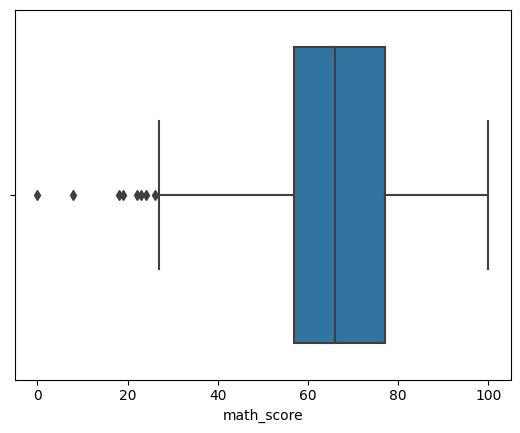

In [11]:
sns.boxplot(data['math_score'])

<AxesSubplot: xlabel='reading_score'>

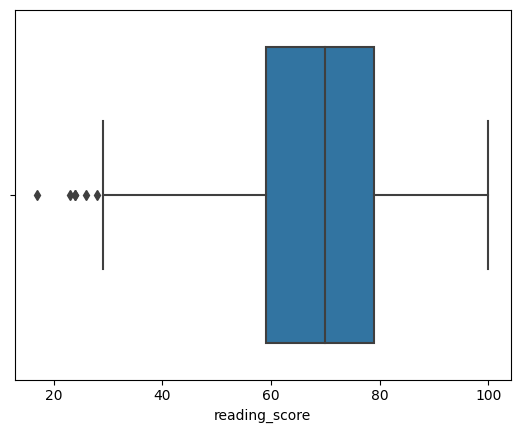

In [12]:
sns.boxplot(data['reading_score'])

In [25]:
data['math_score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [36]:
q1=data['math_score'].quantile(0.25)

In [37]:
q2=data['math_score'].quantile(0.75)

In [38]:
q3=data['math_score'].quantile(0.75)

In [39]:
IQR=q3-q1

In [40]:
upper_limit=q3+(1.5*IQR)

In [41]:
lower_limit=q1-(1.5*IQR)

In [42]:
upper_limit

107.0

In [43]:
lower_limit

27.0

In [44]:
data[data['math_score']<lower_limit]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


In [51]:
data_outlier=data[data['math_score']>-lower_limit and data['math_score']<=upper_limit]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [49]:
data_outlier

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


In [45]:
data[data['math_score']>upper_limit]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [50]:
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [26]:
def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.25)
    q2=df[variable].quantile(0.75)
    iqr=q2-q1
    up_limit=q2+(1.5*iqr)
    low_limit=q2-(1.5*iqr)
    return up_limit,low_limit

<AxesSubplot: xlabel='gender', ylabel='count'>

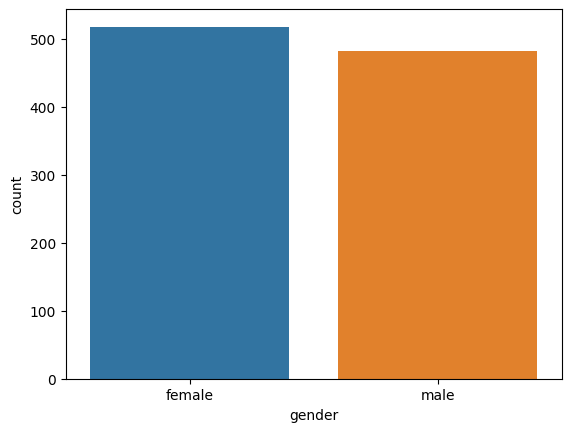

In [27]:
sns.countplot(data['gender'])

<AxesSubplot: xlabel='race_ethnicity', ylabel='count'>

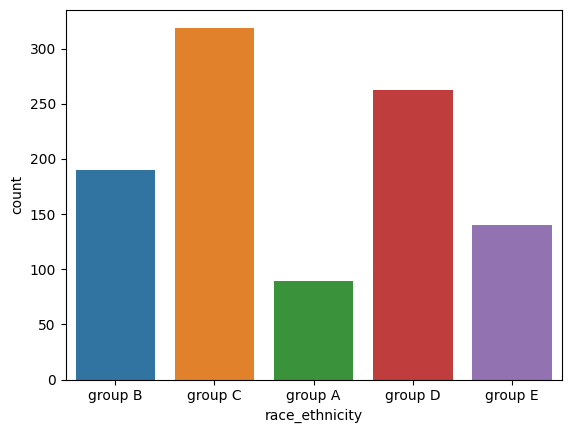

In [28]:
sns.countplot(data['race_ethnicity'])

In [29]:
df=data.groupby('gender').mean()


In [30]:
df['Average'][0]

69.56949806949807

In [31]:
df['Average'][1]

65.8374827109267

In [32]:
df['math_score'][1]

68.72821576763485

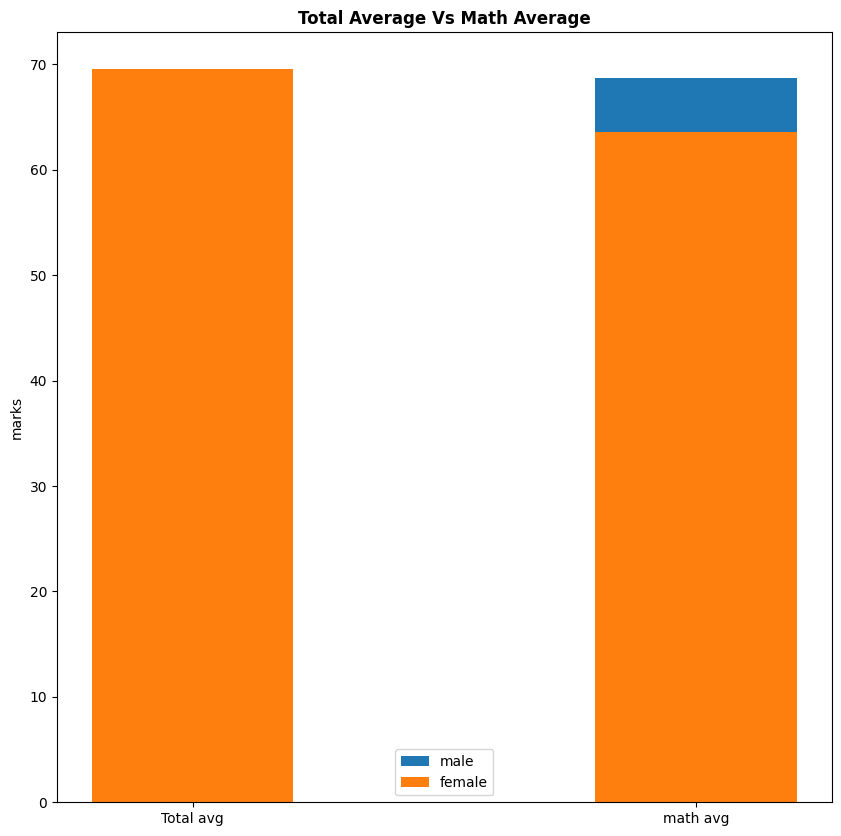

In [37]:
plt.figure(figsize=(10,10))
X=['Total avg','math avg']
femalscore=df['Average'][0],df['math_score'][0]
malescore=df['Average'][1],df['math_score'][1]
X_axis=np.arange(len(X))
plt.bar(X_axis,malescore,0.4,label='male')
plt.bar(X_axis,femalscore,0.4,label='female')
plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("Total Average Vs Math Average",fontweight='bold')
plt.legend()
plt.show()

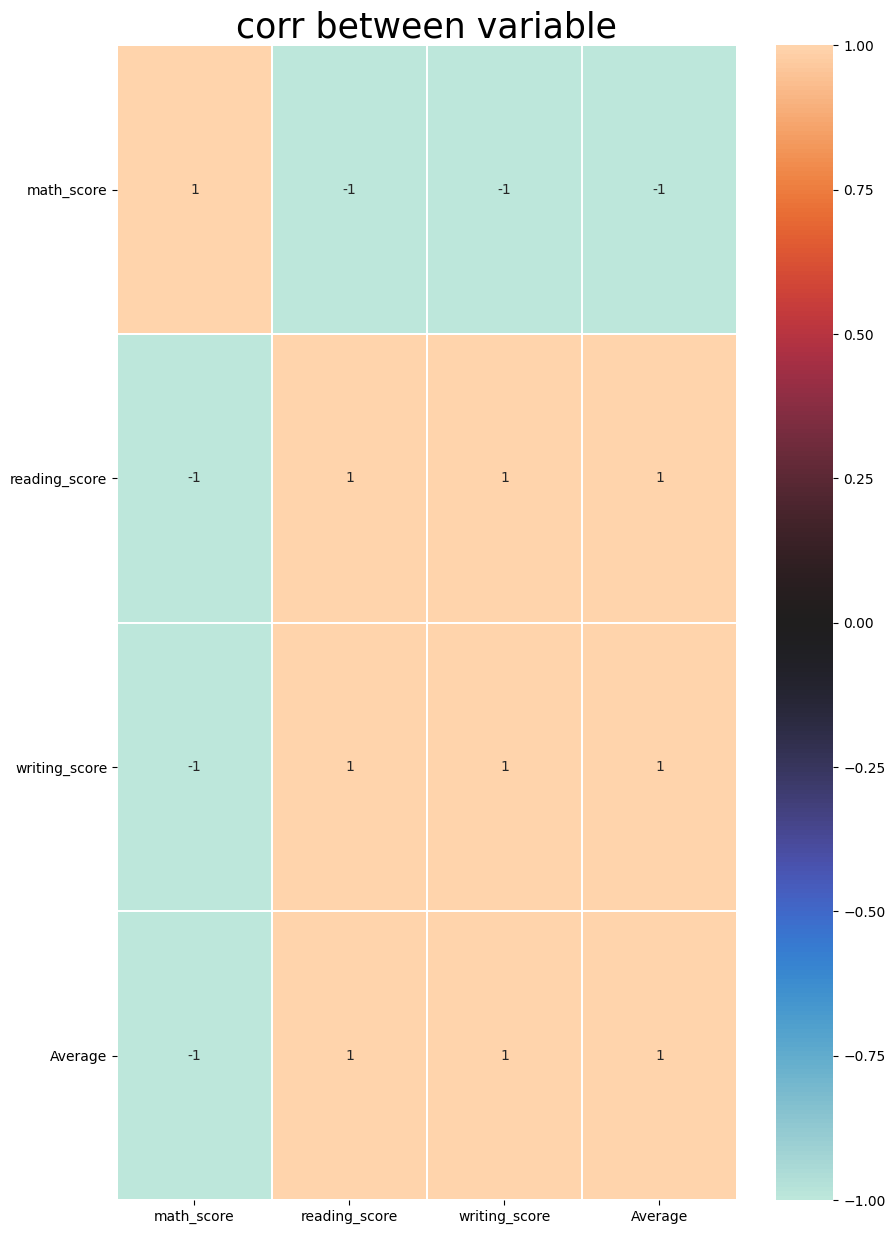

In [49]:
sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,15)
plt.title("corr between variable",color="black",size=25)
plt.show()

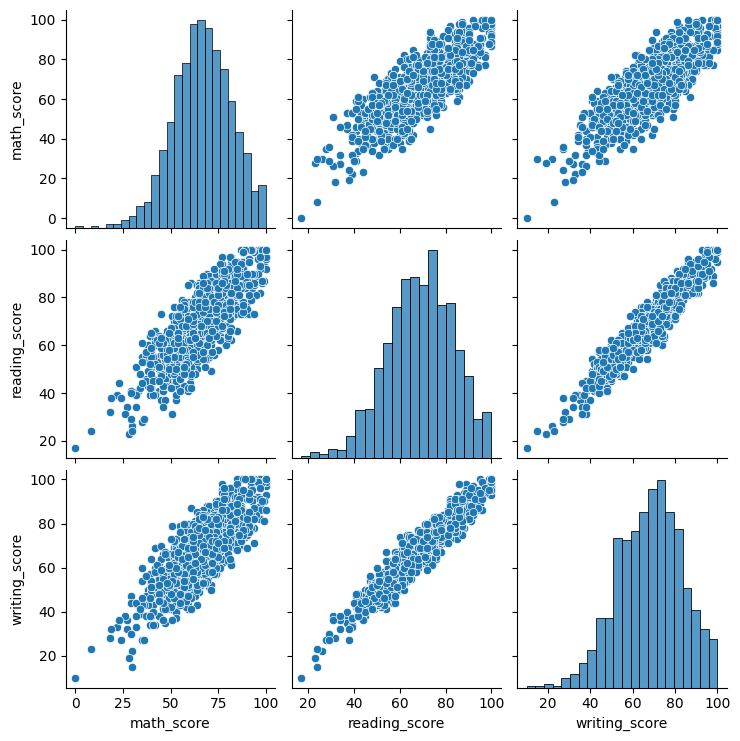

In [43]:
sns.pairplot(data_num)

<AxesSubplot: >

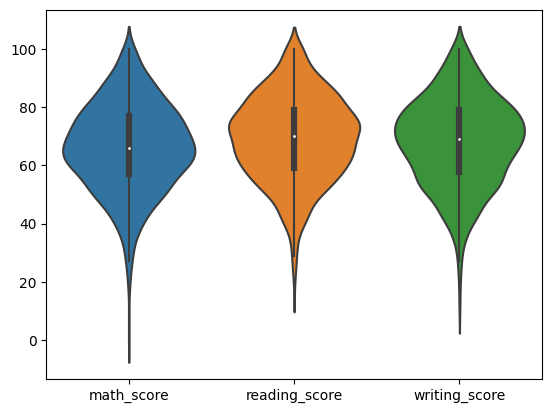

In [51]:
sns.violinplot(data=data_num)